### Student Details

Student name: Lin Yuan Chong

Student ID: 22249516

# Option 1: Logistic Regression and Multi-Class with scikit-learn

In [1]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# From https://jonchar.net/notebooks/Artificial-Neural-Network-with-Keras/
# Method to plot decision boundary.
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
    
    return fig, ax

In [3]:
# Read.
df = pd.read_csv('/content/iris_data.csv', header=0)
df.sample(10)

,sepal_length,sepa_width,petal_length,petal_width,class
134,6.1,2.6,5.6,1.4,Iris-virginica
4,5.0,3.6,1.4,0.2,Iris-setosa
96,5.7,2.9,4.2,1.3,Iris-versicolor
109,7.2,3.6,6.1,2.5,Iris-virginica
70,5.9,3.2,4.8,1.8,Iris-versicolor
37,4.9,3.1,1.5,0.1,Iris-setosa
28,5.2,3.4,1.4,0.2,Iris-setosa
149,5.9,3.0,5.1,1.8,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor


## Part 1: Adapting the Adaline Class

### Adaline class
From https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

In [4]:
# Adaline class.
class AdalineGD(object):
  def __init__(self, eta=0.01, epochs=50):
    self.eta = eta
    self.epochs = epochs

  def train(self, X, y):
    self.w_ = np.zeros(1 + X.shape[1])
    self.cost_ = []

    for i in range(self.epochs):
      output = self.net_input(X)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
    return self.net_input(X)

  def predict(self, X):
    return np.where(self.activation(X) >= 0.0, 1, -1)

In [5]:
# Genarate dataframe for setosa and versicolor.
setDf = df.loc[df[" class"] == "Iris-setosa"]
verDf = df.loc[df[" class"] == "Iris-versicolor"]

# Select row 0, 2, and 4(petal_len, sepal_len, and labels) where " class" = setosa|versicolor.
setVerDf = df.iloc[:, [0,2,4]][(df[" class"] == "Iris-setosa") | (df[" class"] == "Iris-versicolor")]

# Check dataframe length.
print("Number of Iris-setosa samples:\t\t", len(setDf))
print("Number of Iris-versicolor samples:\t", len(verDf))
print("Total samples:\t\t\t\t", len(setVerDf))

# Get all values of generated df.
y = setVerDf.iloc[:, 2].values
# Convert values within the array to either 0 or 1.
y = np.where((y=='Iris-setosa'), 0, 1)

# Inputs: sep_len, pet_len.
X = setVerDf.iloc[0:100, [0,1]].values

setVerDf

Number of Iris-setosa samples:		 50
Number of Iris-versicolor samples:	 50
Total samples:				 100


,sepal_length,petal_length,class
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa
...,...,...,...
95,5.7,4.2,Iris-versicolor
96,5.7,4.2,Iris-versicolor
97,6.2,4.3,Iris-versicolor
98,5.1,3.0,Iris-versicolor


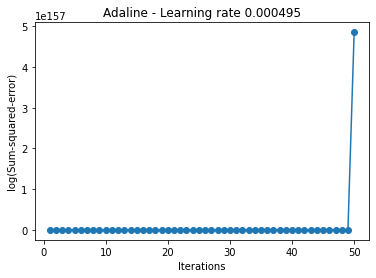

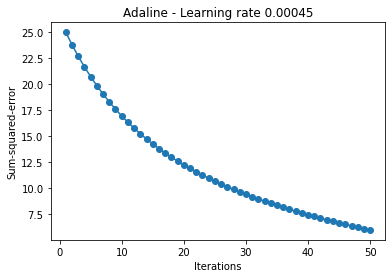

Decision Boundary for Adaline model 1(Learning rate: 0.01).
Decision Boundary for Adaline model 1(Learning rate: 0.00045).


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa57e2fa3d0>)

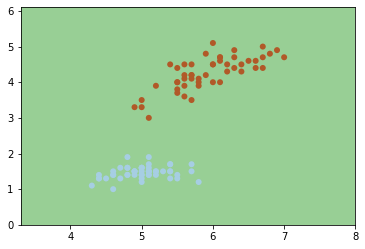

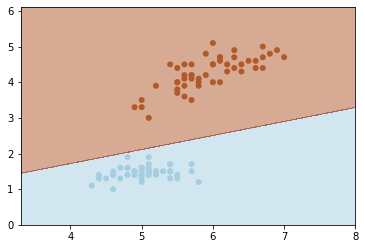

In [6]:
# Adaline model 1.
ada1 = AdalineGD(epochs=50, eta=0.01).train(X, y)
plt.plot(range(1, len(ada1.cost_)+1), ada1.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Adaline - Learning rate 0.000495')
plt.show()

# Adaline model 2(appropriate learning rate).
ada2 = AdalineGD(epochs=50, eta=0.000491).train(X, y)
plt.plot(range(1, len(ada2.cost_)+1), ada2.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.00045')
plt.show()

print("Decision Boundary for Adaline model 1(Learning rate: 0.01).")
plot_decision_boundary(X, y, ada1, steps=1000, cmap='Paired')
print("Decision Boundary for Adaline model 1(Learning rate: 0.00045).")
plot_decision_boundary(X, y, ada2, steps=1000, cmap='Paired')

## Logistic regression
Adapt the Adaline class to use logistic regression. Recall, the `activation` function for logistic regression is the sigmoid function:

\begin{equation}
g\left(z\right) = \text{logit}^{-1}(z) = \frac{1}{1 + e^{-z}}
\end{equation}

where

\begin{equation}
z = \textbf{w} \cdot \textbf{x} = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n
\end{equation}

$z$ is given by the function `net_input` in the class.  Note: In Andrew Ng's videos, recall, he uses $\theta_i$ for the weights instead of $w_i$. And in some other videos, you may be see $\alpha$ used instead of $z$. This type of notation is not standardised, and the lack of standardised notation is something you will need to get used to in general.

The cost function is also updated to match the activation function:

\begin{equation}
\text{J}\left(\textbf{w}\right) = -\sum_i y^{(i)} \log\left(g(z^{(i)})\right) + 
                                   \left(1 - y^{(i)}\right) \log\left(1 - g(z^{(i)}\right))
\end{equation}

where $g\left(z\right)$ is the `output` after the `net_input` and `activation` functions are called.

Then
1. Read the Iris-setosa and Iris-versicolor, sepal length and petal length
2. Train the algorithm
3. Plot the Logistic cost per epoch of training
4. Plot the decision boundary using the supplied plot_decision_boundary function

HINTS:
1. In the `AdalineGD` class, the `activation` function was not used in training, as it was the same as the `net_input` function. Now, they are different, and the `activation` function has to be called on the output of the `net_input` function during training.
2. The `predict` function needs to call the `net_input` function and the `activation` function in sequence.
3. The sigmoid function maps the full range of real numbers to the range 0 to 1. So the threshold in the predict function needs to be adapted. The output classes should also be changed to 0 and 1 instead of -1 and +1.
4. Use the `np.clip` function to clip the inputs to the `activation` function. E.g. clip $z$ to between -250 and +250. This stops very large numbers being input to the exponentiation function, which could lead to numerical instability.
5. Don't forget to rename the class, as we're now dealing with Logistic Regression rather than Adaline.

### Logistic Regression Class

<span style="color:red">Insert your code below</span>.

In [7]:
from numpy.random.mtrand import zipf

class LogisticRegressionGD(object):
  def __init__(self, eta=0.01, epochs=50):
    self.eta = eta
    self.epochs = epochs

  def train(self, X, y):
    self.w_ = np.zeros(1 + X.shape[1])
    self.cost_ = []
  
    for i in range(self.epochs):
      
      # Call net_input and activation on output.
      net = self.net_input(X)
      output = self.activation(net)

      # print(output)

      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()

      # Given cost function.
      cost = -((y * np.log(output)) + ((1-y) * (np.log(1-output))))
      
      self.cost_.append(cost)

    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, z):
    # Clip z to avoid numerical instability.
    clippedZ = np.clip(z, -250, +250)
    # Sigmoid function on clipped z.
    sig = 1/(1 + np.exp(-clippedZ))

    return sig

  def predict(self, X):
    netIn = self.net_input(X)
    act = np.where(self.activation(netIn) <= 0.5, 0, 1)
    return act

## Part 2: Probabilistic Output

Wait, logistic regression is called regression for a reason. But we have implemented a classification? So let's remove the classification part and simply look at the probability output of logistic regression.

1. Adapt the LogisticRegression class to output probabilities rather than a binary class label. Note that the output of the sigmoid is interpretted as a probability.
2. Train on the same data as above
3. Generate several thousand examples (e.g. 5000) within a valid range (e.g. in this case, both axes between 3 and 8 and 0 and 6 respectively). Make sure the generation is uniform.
4. Predict the probability for each of our random samples
5. Provide a scatter plots of our random samples, with the colour showing the probability (you can just use `c=probas` assuming `probas` is the output of the algorithm, which will provide a scaling from blue to yellow)

<span style="color:red">Insert your code below</span>.

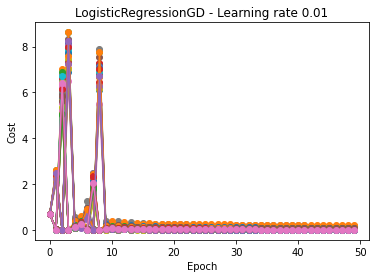

CLASSIFICATION REPORT:

Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        14

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



Decision boundary for LogisticRegressionGD model 1(Learning rate: 0.01):


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa571c11250>)

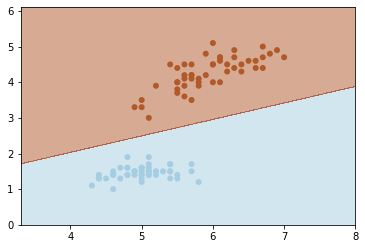

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split train and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# LogisticRegressionGD model 1.
lrgd1 = LogisticRegressionGD(epochs=50, eta=0.01).train(X_train, y_train)
# Predict.
prediction = lrgd1.predict(X_test)

plt.plot(lrgd1.cost_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('LogisticRegressionGD - Learning rate 0.01')
plt.show()

# Statistic stuff.
accuracy = accuracy_score(y_test,prediction)
report = classification_report(prediction, y_test)
#Output classification report.
print("CLASSIFICATION REPORT:\n")
print("Accuracy: ", accuracy)
print(report)
print("\n")

# Decision Boundary for LogisticRegressionGD model 1(Learning rate: 0.01).
print("Decision boundary for LogisticRegressionGD model 1(Learning rate: 0.01):")
plot_decision_boundary(X, y, lrgd1, steps=1000, cmap='Paired')

Function to generate random samples:

In [9]:
import random

# Functions to create a sample dataframe.
def CreateDataFrame(num):

  columns = ['sepal_length', 'petal_length']
  df = pd.DataFrame(columns=columns)

  for i in range(num):
    # Within range.
    sep = round(np.random.uniform(3, 8), 1)
    pet = round(np.random.uniform(0, 6), 1)
    # Assign.
    df.loc[i]= [sep, pet]

  return df

# Create sample dataframe.
sampleDf = CreateDataFrame(5000)
sampleDf.sample(5)

,sepal_length,petal_length
1184,6.4,2.1
2443,4.5,2.3
4308,3.7,1.6
3183,3.2,3.8
4473,7.4,2.7


In [10]:
# Predict.
sampleDf['pred_class'] = lrgd1.predict(sampleDf.iloc[:,:])

In [11]:
# Sample the predicted df.
sampleDf.sample(5)

,sepal_length,petal_length,pred_class
4526,5.6,4.1,1
365,7.9,3.5,0
2783,6.0,4.2,1
459,3.5,2.4,1
2271,3.5,0.3,0


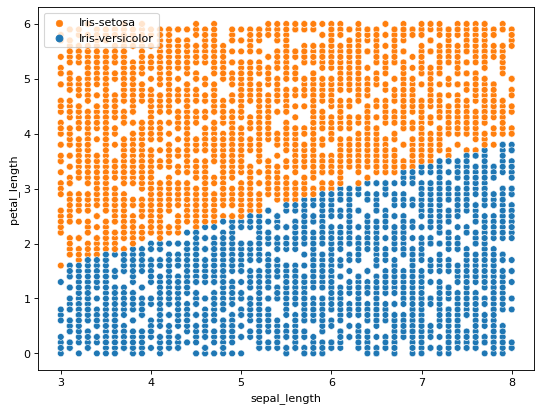

In [12]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from matplotlib.pyplot import figure
import seaborn as sns

figure(figsize=(8, 6), dpi=80)

#Obtain decision boundary.
sns.scatterplot(data=sampleDf, x="sepal_length", y="petal_length", hue="pred_class")
plt.legend(labels=["Iris-setosa", "Iris-versicolor"])

#Manually set colors for legend.
#https://matplotlib.org/stable/gallery/color/named_colors.html
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('tab:orange')
leg.legendHandles[1].set_color('tab:blue')

plt.show()

## Part 3: Multi-class Logistic Regression with scikit-learn

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels 
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Plot the scaled data
4. Train an instance of the scikitlearn LogisticRegression algorithm on the provided data
    1. You can use all the default parameters
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

Scikit-learn's LogisticRegression class has a parameter to control the regularisation. This parameter is C is the inverse of $\lambda$, which is described in the SVM videos. Note that the step above where the data is normalised is hugely important, as regularisation only works properly when data is normalised.
1. Plot the decision boundary above when you set C to smaller and larger values (even 0.01 and 100)
2. Describe what you observe with reference to what you know about regularisation from the material provided

<span style="color:red">Insert your code below</span>.

In [13]:
from sklearn.linear_model import LogisticRegression

# Genarate dataframe for all three flower types.
setDf = df.loc[df[" class"] == "Iris-setosa"]
verDf = df.loc[df[" class"] == "Iris-versicolor"]
virDf = df.loc[df[" class"] == "Iris-virginica"]

# Select row 0, 2, and 4(petal_len, pet_wid, and labels) where " class" = setosa|versicolor|virginica.
setVerVirDf = df.iloc[:, [2, 3, 4]][(df[" class"] == "Iris-setosa") | (df[" class"] == "Iris-versicolor") | (df[" class"] == "Iris-virginica")]

# Check dataframe length.
print("Number of Iris-setosa samples:\t\t", len(setDf))
print("Number of Iris-versicolor samples:\t", len(verDf))
print("Number of Iris-virginica samples:\t", len(virDf))
print("Total samples:\t\t\t\t", len(setVerVirDf))

# Get all values of generated df.
y = setVerVirDf.iloc[:, 2].values

# Convert values within the array to either 0, 1, or 2.
y[y == 'Iris-setosa'] = 0
y[y == 'Iris-versicolor'] = 1
y[y == 'Iris-virginica'] = 2

# Inputs: pet_len, pet_wid.
X = setVerVirDf.iloc[0:150, [0,1]].values

len(y)

Number of Iris-setosa samples:		 50
Number of Iris-versicolor samples:	 50
Number of Iris-virginica samples:	 50
Total samples:				 150


150

In [14]:
# Split train and test data(30% test, 70% train).
# Stratify parameter ensures uniform type of data are obtained(33% each).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Need to convert y_train to int to avoid errors when training.
y_train = y_train.astype('int')
len(y_test)

45

In [15]:
from sklearn.preprocessing import StandardScaler
# Use standard scaler to fit data.
scaler = StandardScaler()
scaledXTR = scaler.fit_transform(X_train)
scaledXTS = scaler.fit_transform(X_test)

# plt.plot(range(1, len(), ada2.cost_, marker='o'))
# plt.xlabel('Iterations')
# plt.ylabel('Sum-squared-error')
# plt.title('Adaline - Learning rate 0.00045')
# plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression

# scikitlearn LogisticRegression model.
logisticRegr1 = LogisticRegression().fit(X_train, y_train)

# Predict.
prediction = logisticRegr1.predict(X_test)
len(prediction)

45

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa570e7e9d0>)

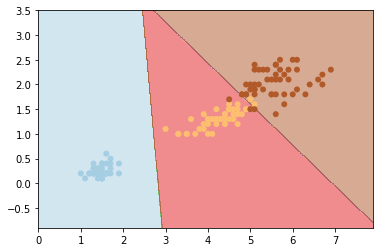

In [17]:
# Plot decision boundary.
plot_decision_boundary(X, y, logisticRegr1)

In [18]:
from sklearn.metrics import accuracy_score

# Convert nparray to list so for accuracy_score calculation.
y_true = y_test.tolist()
y_pred = prediction.tolist()

# Calculate accuracy score.
acc = accuracy_score(y_true, y_pred)

print("Accuracy score on the test data: ", round(acc, 2))

Accuracy score on the test data:  0.93


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa571cb0590>)

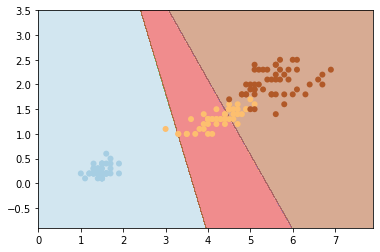

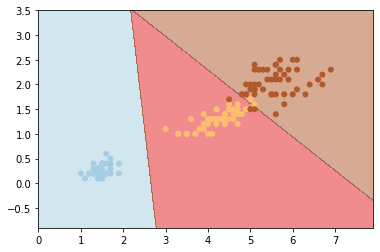

In [19]:
# 2nd scikitlearn LogisticRegression model (C=0.01)
logisticRegr2 = LogisticRegression(C=0.01).fit(X_train, y_train)
# Plot
plot_decision_boundary(X, y, logisticRegr2)

# 3rd scikitlearn LogisticRegression model (C=100)
logisticRegr3 = LogisticRegression(C=100).fit(X_train, y_train)
# Plot
plot_decision_boundary(X, y, logisticRegr3)

##Describe what you observe with reference to what you know about regularisation from the material provided.
By changing the C value, the regularization strength changes. Like in support vector machines, smaller values specify stronger regularization. When visualised, we can observe that the decision boundary changes accordingly. Larger C values typically result in more accurate results.